<a href="https://colab.research.google.com/github/roshank1605A04/Cervical-Cancer-Prediction/blob/master/CevicalCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Installing Libraries**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

**Importing the Dataset**

In [ ]:
data = pd.read_csv("C:/Users/gk143/OneDrive/Desktop/kag_risk_factors_cervical_cancer.csv")

print(data.shape)

data.head()

(858, 36)


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             858 non-null object
First sexual intercourse              858 non-null object
Num of pregnancies                    858 non-null object
Smokes                                858 non-null object
Smokes (years)                        858 non-null object
Smokes (packs/year)                   858 non-null object
Hormonal Contraceptives               858 non-null object
Hormonal Contraceptives (years)       858 non-null object
IUD                                   858 non-null object
IUD (years)                           858 non-null object
STDs                                  858 non-null object
STDs (number)                         858 non-null object
STDs:condylomatosis                   858 non-null object
STDs:cervical condylomatosis          858 non-null object
STDs:vaginal condylomatosi

In [ ]:
data.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# determining the null values in each column

data = data.replace("?", np.nan)
data = data.convert_objects(convert_numeric = True)

data.isnull().sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [ ]:
data.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [ ]:
# 0 means not cancer affected and 1 means cancer affected cell

data['Biopsy'].value_counts()

0    803
1     55
Name: Biopsy, dtype: int64

In [ ]:
# various number of sexual partners in the given dataset

data['Number of sexual partners'].value_counts()

2.0     272
3.0     208
1.0     206
4.0      78
5.0      44
6.0       9
7.0       7
8.0       4
9.0       1
28.0      1
10.0      1
15.0      1
Name: Number of sexual partners, dtype: int64

** Correlation Plot**

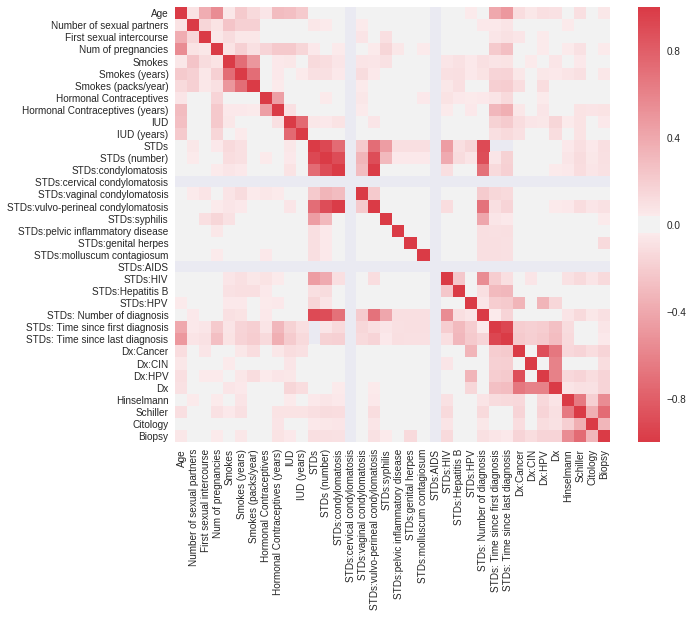

In [ ]:
# correlation plot

f, ax = plt.subplots(figsize = (10, 8))

corr = data.corr()
sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool), 
            cmap = sns.diverging_palette(10, 10, as_cmap = True), square = True, ax = ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


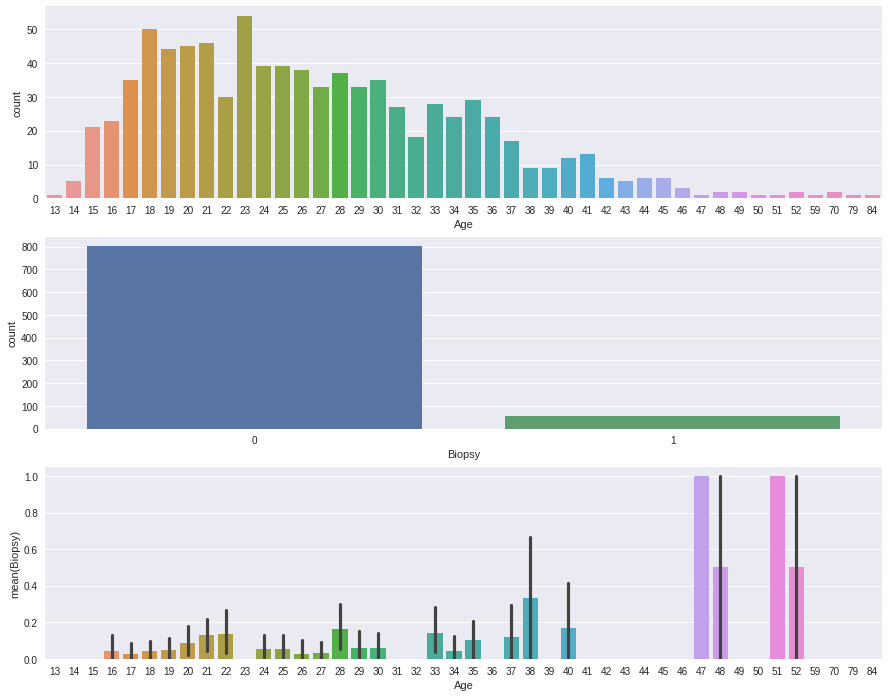

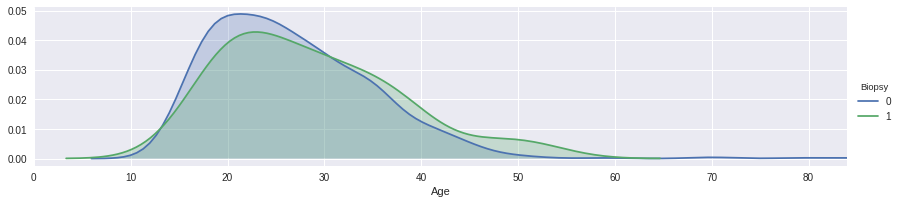

In [ ]:
# Biopsy vs no. of sexual partners

#categorical to categorical
fig, (ax1,ax2) = plt.subplots(2, 1, figsize = (15, 8))
sns.countplot(x = 'Number of sexual partners', data = data, ax=ax1)
sns.barplot(x = 'Number of sexual partners', y = 'Biopsy', data = data, ax=ax2) 

#continuous to categorical
facet = sns.FacetGrid(data, hue='Biopsy',aspect=4)
facet.map(sns.kdeplot,'Number of sexual partners',shade= True)
facet.set(xlim=(0, data['Number of sexual partners'].max()))
facet.add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


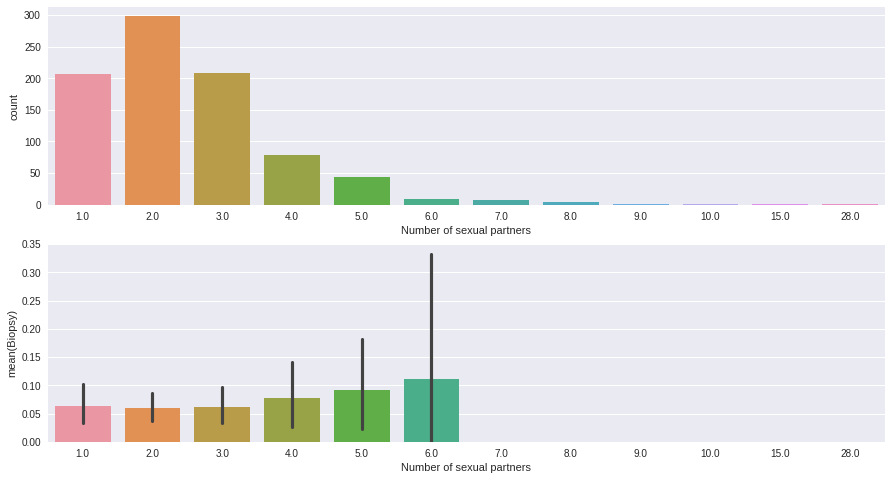

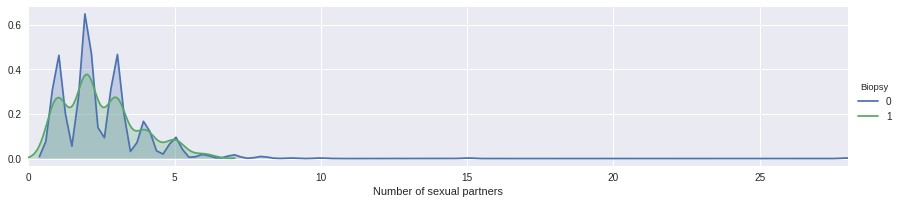

In [ ]:
# Biopsy vs no. of sexual partners

#categorical to categorical
fig, (ax1,ax2) = plt.subplots(2, 1, figsize = (15, 8))
sns.countplot(x = 'Number of sexual partners', data = data, ax=ax1)
sns.barplot(x = 'Number of sexual partners', y = 'Biopsy', data = data, ax=ax2) 

#continuous to categorical
facet = sns.FacetGrid(data, hue='Biopsy',aspect=4)
facet.map(sns.kdeplot,'Number of sexual partners',shade= True)
facet.set(xlim=(0, data['Number of sexual partners'].max()))
facet.add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


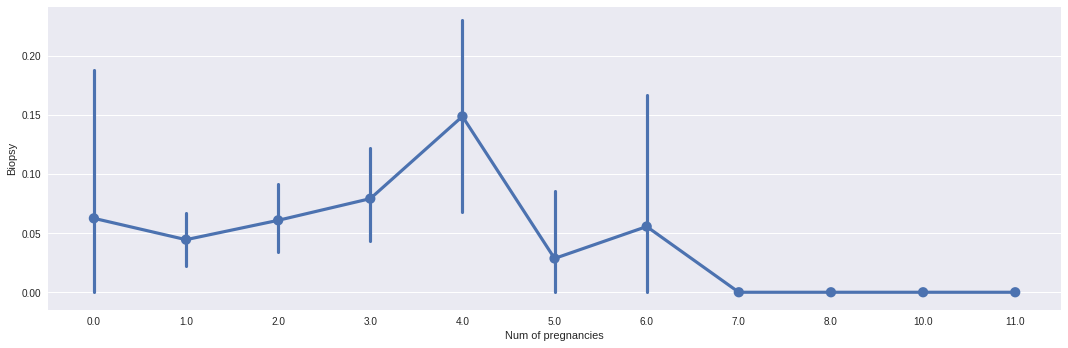

In [ ]:
# biopsy vs no. of pregnancies

sns.factorplot('Num of pregnancies','Biopsy',data = data, size=5, aspect=3)

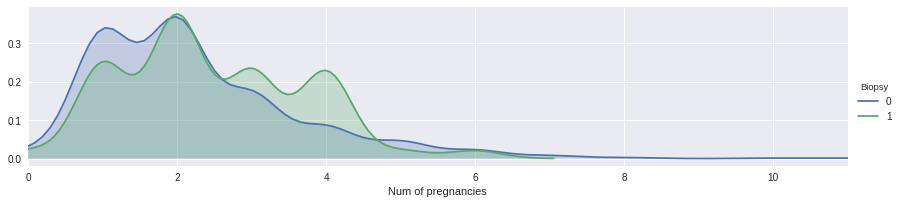

In [ ]:
#continuous to categorical
facet = sns.FacetGrid(data, hue='Biopsy', aspect=4)
facet.map(sns.kdeplot,'Num of pregnancies', shade= True)
facet.set(xlim=(0, data['Num of pregnancies'].max()))
facet.add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


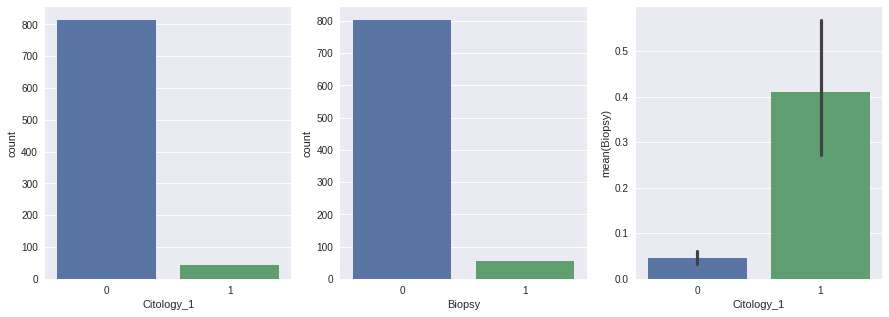

In [ ]:
fig, (axis1,axis2,axis3) = plt.subplots(1, 3, figsize = (15, 5))
sns.countplot(x = 'Citology_1', data=data, ax = axis1)
sns.countplot(x = 'Biopsy', data = data, ax = axis2)
sns.barplot(x = 'Citology_1', y = 'Biopsy', data = data, ax = axis3)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


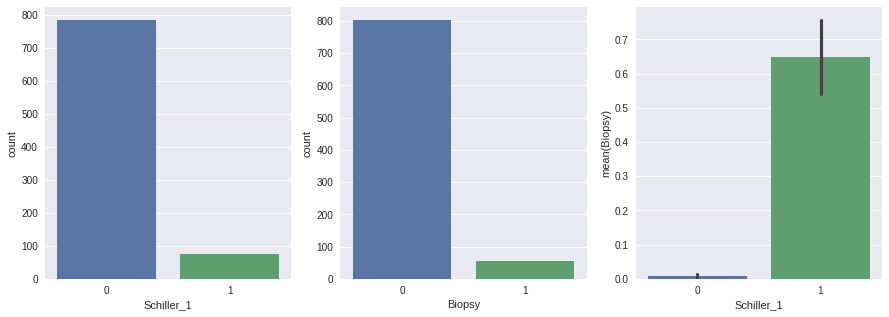

In [ ]:
# Biopsy vs schiller

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))
sns.countplot(x='Schiller_1', data=data, ax=axis1)
sns.countplot(x='Biopsy', data=data, ax=axis2)
sns.barplot(x='Schiller_1', y='Biopsy', data=data, ax=axis3)

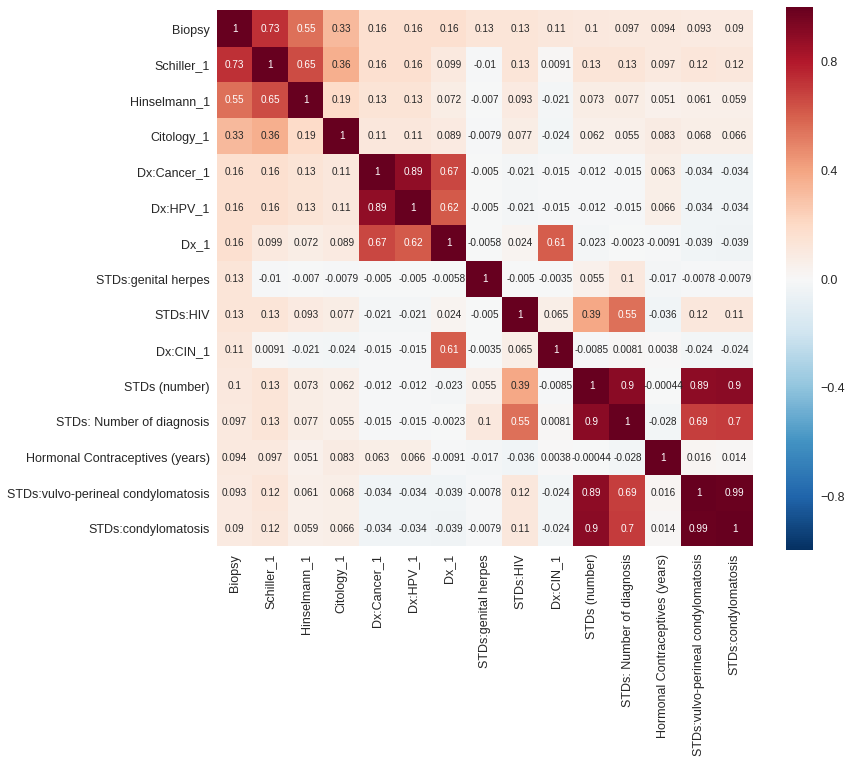

In [ ]:
# list the heatmap of top correlation

corr = data.corr()

# number of variables for heatmap
k = 15

cols = corr.nlargest(k, 'Biopsy')['Biopsy'].index
cm = np.corrcoef(data[cols].values.T)

plt.figure(figsize=(12, 10))

sns.set(font_scale=1.25)
sns.heatmap(cm, cbar = True, annot = True, square = True, annot_kws = {'size': 10},
                 yticklabels = cols.values, xticklabels = cols.values)
plt.show()

**Data Preprocessing**

In [ ]:
# Imputing the missing values from the given dataset
# we will impute the categorical variables with 0 or 1 and continuous variables with median value

data['Number of sexual partners'] = data['Number of sexual partners'].fillna(data['Number of sexual partners'].median())
data['Number of sexual partners'].isnull().any()

# data['Number of sexual partners'].value_counts()

False

In [ ]:
# Imputing the missing values from First sexual intercourse

data['First sexual intercourse'] = data['First sexual intercourse'].fillna(data['First sexual intercourse'].median())
data['First sexual intercourse'].isnull().any()

# data['First sexual intercourse'].value_counts()

False

In [ ]:
# Imputing the missing values from Num of pregnancies

data['Num of pregnancies'] = data['Num of pregnancies'].fillna(data['Num of pregnancies'].median())
data['Num of pregnancies'].isnull().any()

# data['Num of pregnancies'].value_counts()

False

In [ ]:
# Imputing the missing values from Smokes

data['Smokes'] = data['Smokes'].fillna(data['Smokes'].median())
data['Smokes'].isnull().any()

# data['Smokes'].value_counts()

False

In [ ]:
# Imputing the missing values from Smokes (years)

data['Smokes (years)'] = data['Smokes (years)'].fillna(1)
data['Smokes (years)'].isnull().any()

# data['Smokes (years)'].value_counts()

False

In [ ]:
# Imputing the missing values from Smokes (packs/year)

data['Smokes (packs/year)'] = data['Smokes (packs/year)'].fillna(data['Smokes (packs/year)'].median())
data['Smokes (packs/year)'].isnull().any()

# data['Smokes (packs/year)'].value_counts()

False

In [ ]:
# Imputing the missing values from Hormonal Contraceptives

data['Hormonal Contraceptives'] = data['Hormonal Contraceptives'].fillna(data['Hormonal Contraceptives'].median())
data['Hormonal Contraceptives'].isnull().any()

# data['Hormonal Contraceptives'].value_counts()

False

In [ ]:
# Imputing the missing values from Hormonal Contraceptives (years)

data['Hormonal Contraceptives (years)'] = data['Hormonal Contraceptives (years)'].fillna(data['Hormonal Contraceptives (years)'].median())
data['Hormonal Contraceptives (years)'].isnull().any()

# data['Hormonal Contraceptives (years)'].value_counts()

False

In [ ]:
# Imputing the missing values from IUD

data['IUD'] = data['IUD'].fillna(0)
data['IUD'].isnull().any()

# data['IUD'].value_counts()

False

In [ ]:
# Imputing the missing values from IUD (years)

data['IUD (years)'] = data['IUD (years)'].fillna(0)
data['IUD (years)'].isnull().any()

# data['IUD (years)'].value_counts()

False

In [ ]:
# Imputing the missing values from STDs

data['STDs'] = data['STDs'].fillna(1)
data['STDs'].isnull().any()

# data['STDs'].value_counts()

False

In [ ]:
# Imputing the missing values from STDs (number)

data['STDs (number)'] = data['STDs (number)'].fillna(data['STDs (number)'].median())
data['STDs (number)'].isnull().any()

# data['STDs (number)'].value_counts()

False

In [ ]:
# Imputing the missing values from STDs:condylomatosis

data['STDs:condylomatosis'] = data['STDs:condylomatosis'].fillna(data['STDs:condylomatosis'].median())
data['STDs:condylomatosis'].isnull().any()

# data['STDs:condylomatosis'].value_counts()

False

In [ ]:
# Imputing the missing values from STDs:cervical condylomatosis

data['STDs:cervical condylomatosis'] = data['STDs:cervical condylomatosis'].fillna(data['STDs:cervical condylomatosis'].median())
data['STDs:cervical condylomatosis'].isnull().any()

# data['STDs:cervical condylomatosis'].value_counts()

False

In [ ]:
# Imputing the missing values from STDs:vaginal condylomatosis

data['STDs:vaginal condylomatosis'] = data['STDs:vaginal condylomatosis'].fillna(data['STDs:vaginal condylomatosis'].median())
data['STDs:vaginal condylomatosis'].isnull().any()

# data['STDs:vaginal condylomatosis'].value_counts()

False

In [ ]:
# Imputing the missing values from STDs:vulvo-perineal condylomatosis

data['STDs:vulvo-perineal condylomatosis'] = data['STDs:vulvo-perineal condylomatosis'].fillna(data['STDs:vulvo-perineal condylomatosis'].median())
data['STDs:vulvo-perineal condylomatosis'].isnull().any()

# data['STDs:vulvo-perineal condylomatosis'].value_counts()

False

In [ ]:
# Imputing the missing values from STDs:syphilis

data['STDs:syphilis'] = data['STDs:syphilis'].fillna(data['STDs:syphilis'].median())
data['STDs:syphilis'].isnull().any()

# data['STDs:syphilis'].value_counts()

False

In [ ]:
# Imputing the missing values from STDs:pelvic inflammatory diseases

data['STDs:pelvic inflammatory disease'] = data['STDs:pelvic inflammatory disease'].fillna(data['STDs:pelvic inflammatory disease'].median())
data['STDs:pelvic inflammatory disease'].isnull().any()

# data['STDs:pelvic inflammatory disease'].value_counts()

False

In [ ]:
# Imputing the missing values from STDs:genital herpes

data['STDs:genital herpes'] = data['STDs:genital herpes'].fillna(data['STDs:genital herpes'].median())
data['STDs:genital herpes'].isnull().any()

# data['STDs:genital herpes'].value_counts()

False

In [ ]:
# Imputing the missing values from STDs:molluscum contagiosum

data['STDs:molluscum contagiosum'] = data['STDs:molluscum contagiosum'].fillna(data['STDs:molluscum contagiosum'].median())
data['STDs:molluscum contagiosum'].isnull().any()

# data['STDs:molluscum contagiosum'].value_counts()

False

In [ ]:
# Imputing the missing values from STDs:AIDS

data['STDs:AIDS'] = data['STDs:AIDS'].fillna(data['STDs:AIDS'].median())
data['STDs:AIDS'].isnull().any()

# data['STDs:AIDS'].value_counts()

False

In [ ]:
# Imputing the missing values from STDs:HIV

data['STDs:HIV'] = data['STDs:HIV'].fillna(data['STDs:HIV'].median())
data['STDs:HIV'].isnull().any()

# data['STDs:HIV'].value_counts()

False

In [ ]:
# Imputing the missing values from STDs:Hepatitis B

data['STDs:Hepatitis B'] = data['STDs:Hepatitis B'].fillna(data['STDs:Hepatitis B'].median())
data['STDs:Hepatitis B'].isnull().any()

# data['STDs:Hepatitis B'].value_counts()

False

In [ ]:
# Imputing the missing values from STDs:HPV

data['STDs:HPV'] = data['STDs:HPV'].fillna(data['STDs:HPV'].median())
data['STDs:HPV'].isnull().any()

# data['STDs:HPV'].value_counts()

False

In [ ]:
# Imputing the missing values from STDs: Time since first diagnosis

data['STDs: Time since first diagnosis'] = data['STDs: Time since first diagnosis'].fillna(data['STDs: Time since first diagnosis'].median())
data['STDs: Time since first diagnosis'].isnull().any()

# data['STDs: Time since first diagnosis'].value_counts()

False

In [ ]:
# Imputing the missing values from STDs: Time since last diagnosis

data['STDs: Time since last diagnosis'] = data['STDs: Time since last diagnosis'].fillna(data['STDs: Time since last diagnosis'].median())
data['STDs: Time since last diagnosis'].isnull().any()
 
# data['STDs: Time since last diagnosis'].value_counts()

False

In [ ]:
# Imputing values for categorical variables

data = pd.get_dummies(data = data, columns = ['Smokes','Hormonal Contraceptives','IUD','STDs',
                                      'Dx:Cancer','Dx:CIN','Dx:HPV','Dx','Hinselmann','Citology','Schiller'])

data.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives (years)       0
IUD (years)                           0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0
STDs: Number of diagnosis             0
STDs: Time since first diagnosis      0
STDs: Time since last diagnosis       0
Biopsy                                0


In [ ]:
data.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs:condylomatosis,...,Dx:HPV_0,Dx:HPV_1,Dx_0,Dx_1,Hinselmann_0,Hinselmann_1,Citology_0,Citology_1,Schiller_0,Schiller_1
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.511655,16.995338,2.257576,1.216392,0.446278,2.035331,0.444604,0.155012,0.051282,...,0.979021,0.020979,0.972028,0.027972,0.959207,0.040793,0.948718,0.051282,0.913753,0.086247
std,8.497948,1.644759,2.791883,1.400981,4.057974,2.210351,3.567040,1.814218,0.529617,0.220701,...,0.143398,0.143398,0.164989,0.164989,0.197925,0.197925,0.220701,0.220701,0.280892,0.280892
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,37.000000,37.000000,30.000000,19.000000,4.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Data Visualization**

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


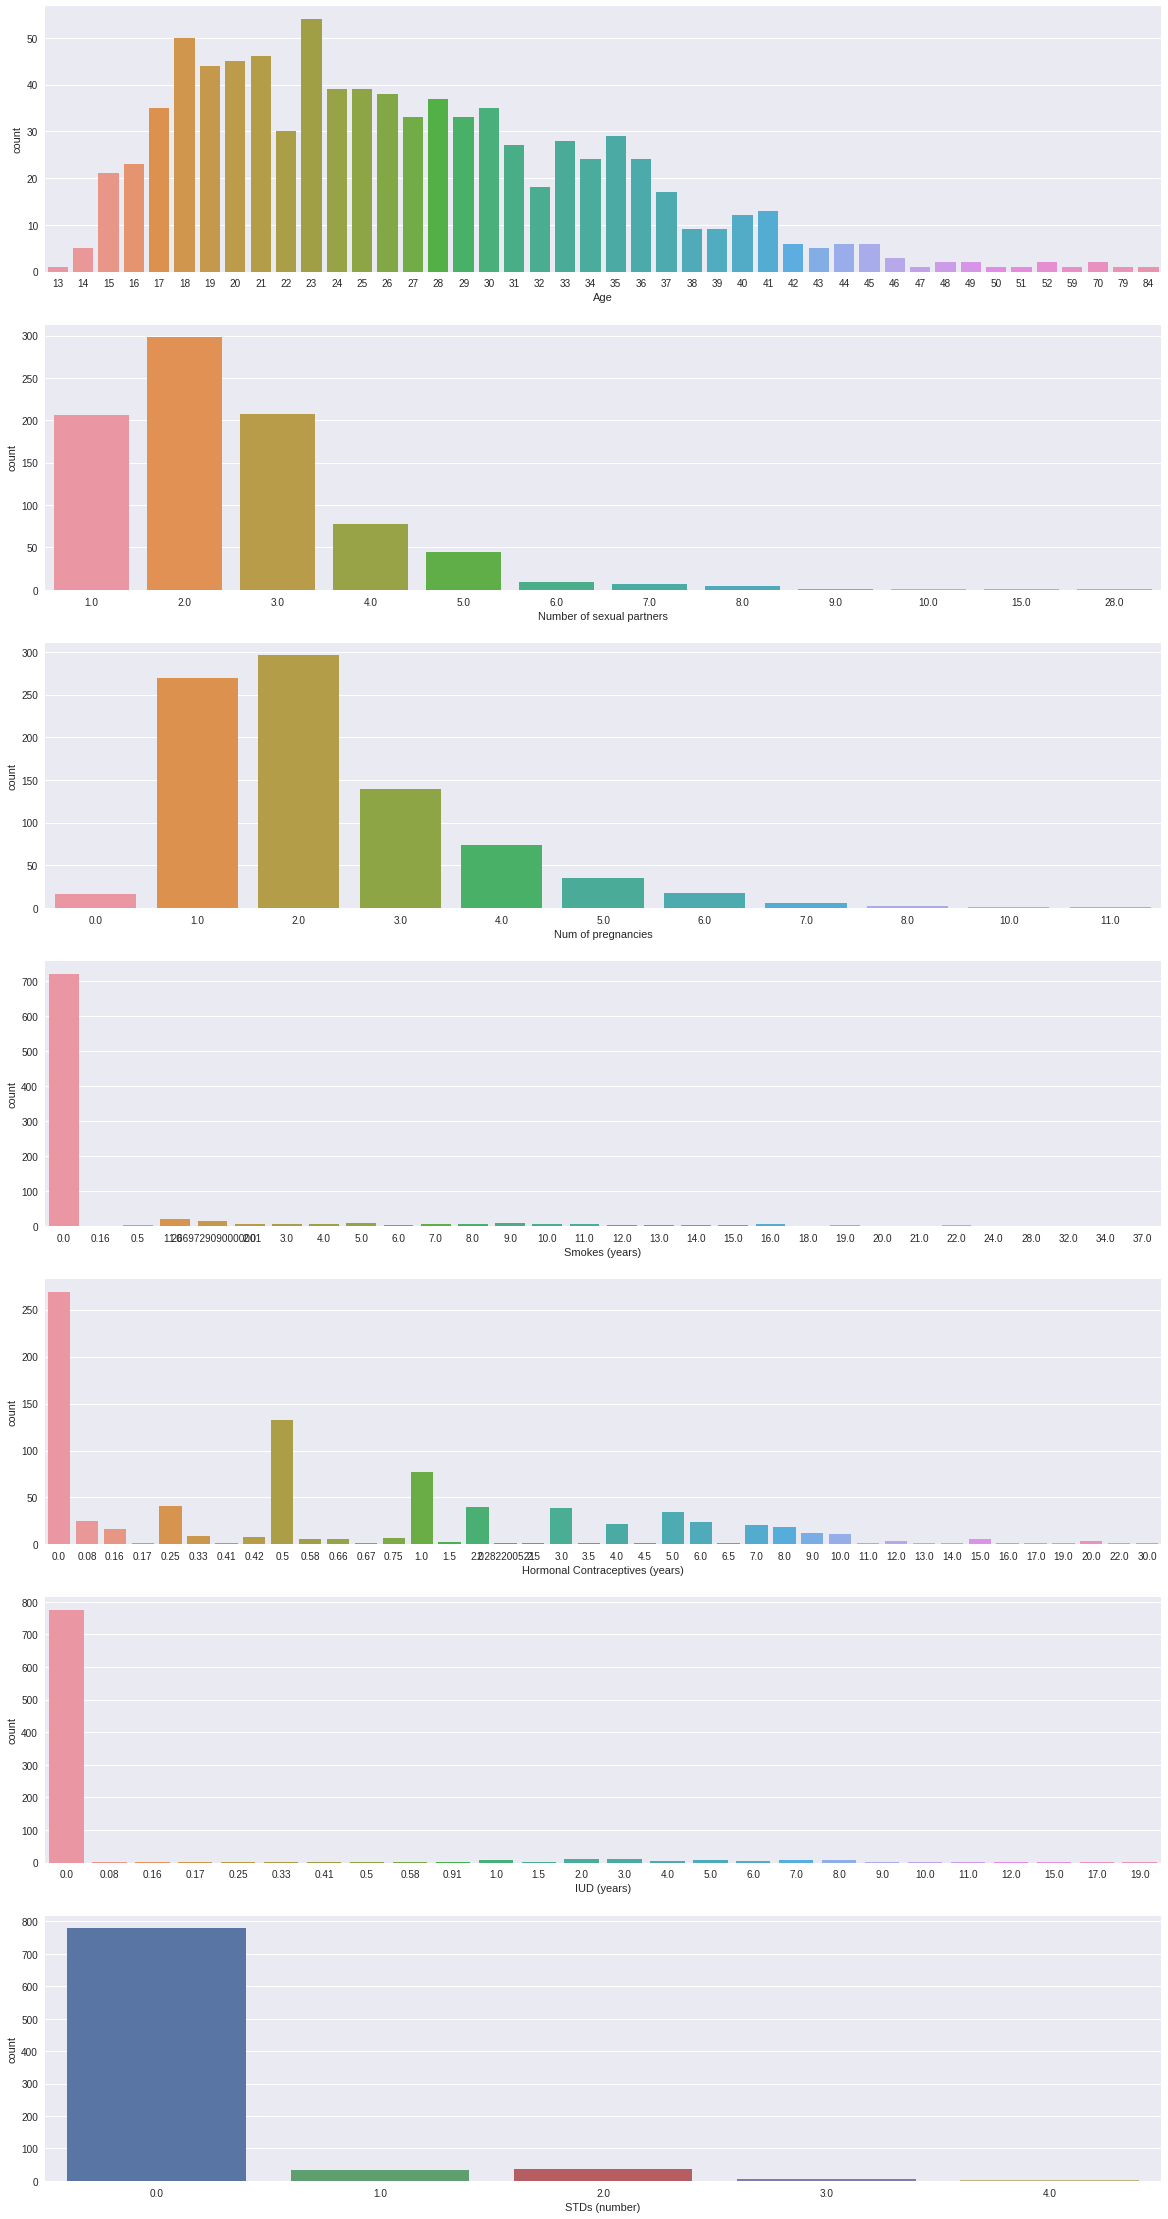

In [ ]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(7, 1, figsize = (20,40))
sns.countplot(x='Age', data=data, ax=ax1)
sns.countplot(x='Number of sexual partners', data=data, ax=ax2)
sns.countplot(x='Num of pregnancies', data=data, ax=ax3)
sns.countplot(x='Smokes (years)', data=data, ax=ax4)
sns.countplot(x='Hormonal Contraceptives (years)', data=data, ax=ax5)
sns.countplot(x='IUD (years)', data=data, ax=ax6)
sns.countplot(x='STDs (number)', data=data, ax=ax7)

In [ ]:
# splitting the dataset into dependent and independent variables

x = data.iloc[:,:46]
y = data.iloc[:,46]

print(x.shape)
print(y.shape)


(858, 46)
(858,)


In [ ]:
# splitting the dataset into  training and test set

from sklearn.cross_validation import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 45)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(514, 46)
(514,)
(344, 46)
(344,)


In [ ]:
# MinMaxScaling

from sklearn.preprocessing import MinMaxScaler

# creating a minmax scaler
mm = MinMaxScaler()

# feeding the independent data into the scaler
x_train = mm.fit_transform(x_train)
x_test = mm.fit_transform(x_test)

**Modelling**

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# creating the model
model = LogisticRegression()

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# Calculating the accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix 
print(confusion_matrix(y_test, y_pred))

Training accuracy : 1.0
Testing accuracy : 1.0
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       312
          1       1.00      1.00      1.00        32

avg / total       1.00      1.00      1.00       344

[[312   0]
 [  0  32]]


**Support Vector Machine**

In [ ]:
from sklearn.svm import SVC

# creating the model
model = SVC()

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# Calculating the accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix 
print(confusion_matrix(y_test, y_pred))


Training accuracy : 1.0
Testing accuracy : 1.0
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       312
          1       1.00      1.00      1.00        32

avg / total       1.00      1.00      1.00       344

[[312   0]
 [  0  32]]


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# creating the model
model = RandomForestClassifier()

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# Calculating the accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix 
print(confusion_matrix(y_test, y_pred))

Training accuracy : 1.0
Testing accuracy : 0.997093023255814
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       312
          1       1.00      0.97      0.98        32

avg / total       1.00      1.00      1.00       344

[[312   0]
 [  1  31]]


**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# creating the model
model = DecisionTreeClassifier()

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# Calculating the accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix 
print(confusion_matrix(y_test, y_pred))


Training accuracy : 1.0
Testing accuracy : 1.0
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       312
          1       1.00      1.00      1.00        32

avg / total       1.00      1.00      1.00       344

[[312   0]
 [  0  32]]


**AdaBoost Classifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# creating the model
model = AdaBoostClassifier()

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# Calculating the accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix 
print(confusion_matrix(y_test, y_pred))

Training accuracy : 1.0
Testing accuracy : 1.0
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       312
          1       1.00      1.00      1.00        32

avg / total       1.00      1.00      1.00       344

[[312   0]
 [  0  32]]


**Artificial Neural Networks**

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
data.shape

(858, 47)

In [ ]:
# Creating the model
model = Sequential()

# input layer
model.add(Dense(output_dim = 400, init = 'uniform', activation = 'relu', input_dim = 46))
model.add(Dropout(0.5))

# first hidden layer
model.add(Dense(output_dim = 300, init = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))

# second hidden layer
model.add(Dense(output_dim = 300, init = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))

# third hidden layer
model.add(Dense(output_dim = 300, init = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))

# fourth hidden layer
model.add(Dense(output_dim = 200, init = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))

# fifth hidden layer
model.add(Dense(output_dim = 100, init = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))

# output layer
model.add(Dense(output_dim = 1, init = 'uniform',  activation = 'sigmoid'))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=46, units=400, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=300, kernel_initializer="uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=300, kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=300, kernel_initializer="uniform")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense

In [ ]:
# summarizing
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 400)               18800     
_________________________________________________________________
dropout_15 (Dropout)         (None, 400)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 300)               120300    
_________________________________________________________________
dropout_16 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 300)               90300     
_________________________________________________________________
dropout_17 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 300)               90300     
__________

In [ ]:
# compiling the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# feeding training data to the model
train_history = model.fit(x_train, y_train, batch_size = 150, epochs = 35, validation_split = 0.2, verbose = 2)


Train on 411 samples, validate on 103 samples
Epoch 1/35
 - 1s - loss: 0.0527 - acc: 0.9976 - val_loss: 0.0568 - val_acc: 1.0000
Epoch 2/35
 - 0s - loss: 0.0522 - acc: 0.9976 - val_loss: 0.0566 - val_acc: 1.0000
Epoch 3/35
 - 0s - loss: 0.0520 - acc: 1.0000 - val_loss: 0.0565 - val_acc: 1.0000
Epoch 4/35
 - 0s - loss: 0.0519 - acc: 1.0000 - val_loss: 0.0564 - val_acc: 1.0000
Epoch 5/35
 - 0s - loss: 0.0518 - acc: 1.0000 - val_loss: 0.0563 - val_acc: 1.0000
Epoch 6/35
 - 0s - loss: 0.0531 - acc: 0.9976 - val_loss: 0.0561 - val_acc: 1.0000
Epoch 7/35
 - 0s - loss: 0.0517 - acc: 1.0000 - val_loss: 0.0560 - val_acc: 1.0000
Epoch 8/35
 - 0s - loss: 0.0515 - acc: 1.0000 - val_loss: 0.0559 - val_acc: 1.0000
Epoch 9/35
 - 0s - loss: 0.0513 - acc: 1.0000 - val_loss: 0.0558 - val_acc: 1.0000
Epoch 10/35
 - 0s - loss: 0.0512 - acc: 1.0000 - val_loss: 0.0557 - val_acc: 1.0000
Epoch 11/35
 - 0s - loss: 0.0511 - acc: 1.0000 - val_loss: 0.0555 - val_acc: 1.0000
Epoch 12/35
 - 0s - loss: 0.0510 - acc:

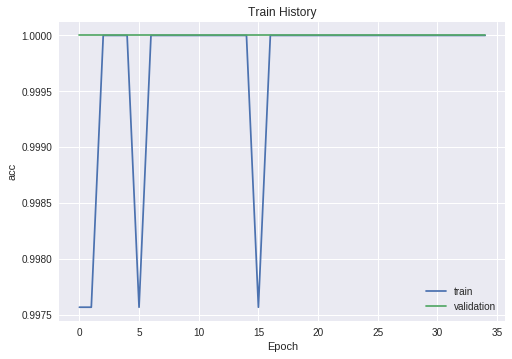

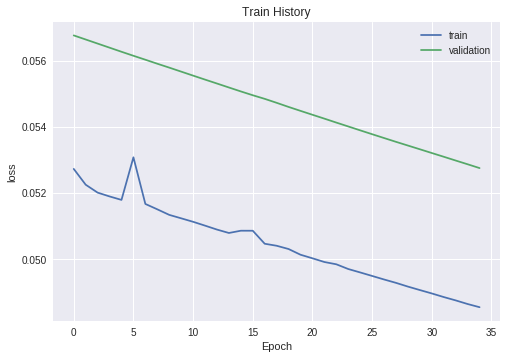

In [ ]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()
    
#visualize the loss and accuracy after each epoch
show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')